# IMPORTS
## 📌 Standard Libraries
- `time` → Provides time-related functions for measuring execution time.

## 📊 Data Handling & Processing
- `pandas` → Used for handling tabular data, DataFrames, and data manipulation.
- `numpy` → Supports numerical computing, arrays, and matrix operations.

## 📉 Data Visualization
- `matplotlib.pyplot` → A fundamental plotting library for graphs and charts.
- `seaborn` → Built on Matplotlib, used for statistical and aesthetically appealing visualizations.

## 🤖 Machine Learning Models
- `XGBRegressor` (XGBoost) → Optimized gradient boosting algorithm for regression.
- `RandomForestRegressor` → Ensemble learning model using multiple decision trees.

## 🔻 Dimensionality Reduction & Feature Engineering
- `PCA` → Principal Component Analysis for reducing dataset dimensions.
- `RobustScaler` → Scales features while handling outliers.
- `SimpleImputer` → Fills missing values using statistical strategies (mean, median, etc.).

## 🔍 Clustering & Unsupervised Learning
- `KMeans` → Clustering algorithm that partitions data into K groups.
- `DBSCAN` → Density-based clustering that detects arbitrarily shaped clusters.

## 🌐 Manifold Learning & Non-Linear Dimensionality Reduction
- `TSNE` → Reduces high-dimensional data while preserving structure.
- `UMAP` → A faster alternative to t-SNE for dimensionality reduction and visualization.

## 📦 Dataset Loading
- `load_dataset` → Fetches pre-built datasets from Hugging Face.

## 🏗️ Data Preprocessing
- `StandardScaler` → Standardizes features to have mean 0 and variance 1.
- `train_test_split` → Splits dataset into training and testing sets for model evaluation.

## 📏 Model Evaluation Metrics
- `mean_squared_error` (MSE) → Measures average squared error in predictions.
- `mean_absolute_error` (MAE) → Computes the absolute differences between actual and predicted values.
- `r2_score` → Determines how well a regression model fits the data (coefficient of determination).


In [1]:
# Standard Libraries
import time  
import random

# Data Handling & Processin
import pandas as pd  
import numpy as np 

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Machine Learning Model
from xgboost import XGBRegressor  
from sklearn.ensemble import RandomForestRegressor  

# Dimensionality Reduction & Feature Engineerin
from sklearn.decomposition import PCA  
from sklearn.preprocessing import RobustScaler  
from sklearn.impute import SimpleImputer  

# Clustering & Unsupervised Learning
from sklearn.cluster import KMeans, DBSCAN  

# Manifold Learning & Non-Linear Dimensionality Reduction
from sklearn.manifold import TSNE  
import umap.umap_ as umap  

# Dataset Loading
from datasets import load_dataset  

# Data Preprocessing
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

In [2]:
#pip install datasets

# EXPLORATORY DATA ANALYSIS

# LLM Inference Energy Consumption Dataset

## Overview

The **LLM Inference Energy Consumption Dataset** provides detailed energy consumption profiles for various Large Language Models (LLMs) across diverse hardware setups. This dataset aims to support research focused on understanding and optimizing the energy efficiency of LLMs during inference, thereby promoting more sustainable AI practices.

## Dataset Contents

- **Energy Consumption Metrics**: Measurements capturing the energy usage of different LLMs during inference tasks.
- **Hardware Specifications**: Details about the hardware configurations used during the measurements, including CPU, GPU, memory, and other relevant components.
- **Model Information**: Metadata about the LLMs evaluated, such as model architecture, size (number of parameters), and any specific configurations or optimizations applied.

## Purpose and Applications

This dataset is designed to:

- **Benchmark Energy Efficiency**: Allow researchers and practitioners to compare the energy consumption of various LLMs under different hardware settings.
- **Optimize Model Deployment**: Assist in identifying more energy-efficient models and configurations for deployment in production environments.
- **Promote Sustainable AI**: Encourage the development and use of LLMs that balance performance with environmental considerations.

## Accessing the Dataset

The dataset is publicly available on the Hugging Face Hub and can be accessed via the following link:

[LLM Inference Energy Consumption Dataset](https://huggingface.co/datasets/ejhusom/llm-inference-energy-consumption)

In [3]:
dataset = load_dataset("ejhusom/llm-inference-energy-consumption", split="train", streaming=True)
raw_data = pd.DataFrame(dataset)

In [4]:
raw_data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,model_name,created_at,total_duration,load_duration,prompt_token_length,prompt_duration,...,named_entities,adjectives,adverbs,length_x_complexity,questions_about_entities,desc_complexity_ratio,word_count_squared,avg_sentence_length_cubed,lexical_diversity,energy_consumption_llm_gpu
0,0.0,0.0,0,0,codellama:7b,2024-05-20 01:29:27.691485835+00:00,2.167467e+11,312573.0,NaN,6.298400e+08,...,0.0,1.0,1.0,0.000000,0.0,0.090909,484.0,10648.000,0.818182,0.0
1,1.0,1.0,1,0,codellama:7b,2024-05-20 01:30:34.454555386+00:00,6.272181e+10,433357.0,39.0,1.437697e+10,...,0.0,1.0,0.0,0.000000,0.0,0.029412,1156.0,39304.000,0.823529,0.0
2,2.0,2.0,2,0,codellama:7b,2024-05-20 01:34:30.874894395+00:00,2.362132e+11,419348.0,35.0,1.301101e+10,...,0.0,1.0,0.0,0.521990,0.0,0.038462,676.0,2197.000,0.807692,0.0
3,3.0,3.0,3,0,codellama:7b,2024-05-20 01:36:11.699366237+00:00,9.673783e+10,365109.0,83.0,2.896404e+10,...,3.0,2.0,0.0,2.469388,0.0,0.030303,4356.0,35937.000,0.681818,0.0
4,4.0,4.0,4,0,codellama:7b,2024-05-20 01:38:59.260219141+00:00,1.640967e+11,312792.0,34.0,1.197915e+10,...,0.0,2.0,4.0,0.652832,0.0,0.222222,729.0,2460.375,0.925926,0.0


In [5]:
raw_data.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,total_duration,load_duration,prompt_token_length,prompt_duration,response_token_length,response_duration,...,named_entities,adjectives,adverbs,length_x_complexity,questions_about_entities,desc_complexity_ratio,word_count_squared,avg_sentence_length_cubed,lexical_diversity,energy_consumption_llm_gpu
count,10694.000000,32283.000000,78728.000000,78728.0,7.869000e+04,7.869000e+04,78425.000000,7.869000e+04,78690.000000,7.869000e+04,...,78728.000000,78728.000000,78728.000000,78728.000000,78728.000000,78728.000000,7.872800e+04,7.872800e+04,78728.000000,78728.000000
mean,2673.000000,4249.961590,3466.902233,0.0,2.728724e+10,3.956343e+06,61.536372,2.626689e+09,283.360605,2.458820e+10,...,2.437341,2.628353,0.858449,2.177907,0.401179,0.120381,9.116104e+03,3.606703e+05,1.083975,0.000098
std,1543.618092,3011.568607,2622.112397,0.0,9.856321e+10,1.189381e+08,104.323629,8.039983e+09,1298.184457,9.665683e+10,...,6.949241,5.245316,1.932527,6.119799,4.744353,0.230088,6.028531e+04,2.809765e+07,0.987398,0.000669
min,0.000000,0.000000,0.000000,0.0,2.062720e+08,1.509040e+05,5.000000,1.222200e+07,1.000000,1.500000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,1.478813e+01,0.034483,0.000000
25%,1336.250000,1761.000000,1422.000000,0.0,3.391103e+09,6.706792e+05,18.000000,1.652792e+08,65.000000,2.819713e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.440000e+02,7.290000e+02,0.805556,0.000016
50%,2673.000000,3778.000000,2936.000000,0.0,7.623249e+09,1.114732e+06,27.000000,2.511215e+08,255.000000,6.534537e+09,...,1.000000,1.000000,0.000000,0.560895,0.000000,0.076923,4.000000e+02,1.728000e+03,0.916667,0.000056
75%,4009.750000,6245.500000,4777.000000,0.0,2.335275e+10,1.712824e+06,46.000000,2.583881e+09,415.000000,1.949074e+10,...,2.000000,3.000000,1.000000,1.321481,0.000000,0.142857,1.156000e+03,6.859000e+03,1.000000,0.000122
max,5346.000000,11827.000000,11827.000000,0.0,1.046414e+13,8.831648e+09,1977.000000,2.788707e+11,285702.000000,1.046098e+13,...,391.000000,229.000000,87.000000,135.601152,245.000000,11.647059,3.928324e+06,3.067587e+09,19.058824,0.143782


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78728 entries, 0 to 78727
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0.2                   10694 non-null  float64
 1   Unnamed: 0.1                   32283 non-null  float64
 2   Unnamed: 0                     78728 non-null  int64  
 3   index                          78728 non-null  int64  
 4   model_name                     78728 non-null  object 
 5   created_at                     78728 non-null  object 
 6   total_duration                 78690 non-null  float64
 7   load_duration                  78690 non-null  float64
 8   prompt_token_length            78425 non-null  float64
 9   prompt_duration                78690 non-null  float64
 10  response_token_length          78690 non-null  float64
 11  response_duration              78690 non-null  float64
 12  prompt                         78728 non-null 

### Cleaning the Dataset: Removing Non-Float and Duplicate Columns  

To ensure the dataset is well-structured for feature analysis, we perform the following cleaning steps:

#### **1️. Dropping Non-Float Columns**
- The dataset contains **categorical** and **metadata columns** that are not useful for numerical feature extraction.
- Columns such as `model_name`, timestamps, or text-based identifiers are removed to focus on **numerical attributes**.

#### **2️. Identifying and Removing Repeated Energy Consumption Columns**
- During the data inspection, multiple columns representing **energy consumption** were found, likely due to redundancy in logging or preprocessing steps.
- To avoid feature duplication and prevent biased analysis, we **retain only one unique representation** of energy consumption.

#### **3️. Organizing Useful Columns**
- After dropping irrelevant and duplicated features, we ensure that the dataset contains **only numerical variables** relevant to energy efficiency, inference duration, and model performance.
- This structured dataset is now ready for **feature engineering, dimensionality reduction (PCA), and clustering**.

By performing this cleanup, we eliminate redundancy and focus on meaningful data, improving the quality and accuracy of our analysis.


In [7]:
raw_data = raw_data.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'index','clock_duration',
                      'start_time', 'end_time','text_standard','type','created_at', 'energy_consumption_llm_total', 
                                  'energy_consumption_llm_cpu', 'energy_consumption_llm_gpu', 'energy_consumption_monitoring'], errors='ignore')

In [8]:
len(raw_data.columns)

66

### Retained Features for Analysis

After cleaning the dataset, we have selected key features that are **essential for analysis** while removing redundant and irrelevant columns. The retained features are categorized into three main groups:

#### **1️. Metadata**
These are categorical attributes that provide context for each data point:
- `model_name` → The name of the Large Language Model (LLM).
- `prompt` → The input text provided to the model.
- `response` → The generated output from the model.

#### **2️. Energy Consumption**
This feature measures the energy used by the LLM during inference:
- `energy_consumption_llm` → Energy consumption recorded for the LLM's response generation.

#### **3️. NLP Features**
These features capture various linguistic, syntactic, and readability attributes of the model-generated text:

- **Text Statistics**: `word_count`, `sentence_count`, `avg_word_length`, `word_diversity`, `unique_word_count`, `avg_sentence_length`
- **Punctuation & Structure**: `punctuation_count`, `stop_word_count`, `long_word_count`, `question_marks`, `exclamation_marks`
- **Linguistic Features**: `named_entity_count`, `noun_count`, `verb_count`, `adj_count`, `adverb_count`, `pronoun_count`, `personal_pronouns`, `named_entities`, `adjectives`, `adverbs`
- **Sentence Complexity**: `prop_adverbs`, `prop_pronouns`, `sentence_embedding_variance`, `length_x_complexity`, `questions_about_entities`, `desc_complexity_ratio`
- **Sentiment Analysis**: `sentiment_polarity`, `sentiment_subjectivity`
- **Readability Metrics**: 
  - `flesch_reading_ease`, `flesch_kincaid_grade`, `gunning_fog`, `smog_index`, `automated_readability_index`
  - `coleman_liau_index`, `linsear_write_formula`, `dale_chall_readability_score`, `spache_readability`
  - `mcalpine_eflaw`, `fernandez_huerta`, `szigriszt_pazos`, `gutierrez_polini`, `crawford`, `osman`, `gulpease_index`, `wiener_sachtextformel`
- **Lexical & Character Features**: `syllable_count`, `lexicon_count`, `char_count`, `letter_count`, `polysyllabcount`, `monosyllabcount`, `lexical_diversity`
- **Mathematical Transformations**: `word_count_squared`, `avg_sentence_length_cubed`
- **Timing & Performance Metrics**: `total_duration`, `load_duration`, `prompt_token_length`, `prompt_duration`, `response_token_length`, `response_duration`, `reading_time`

### **Why These Features?**
- **Metadata** helps associate energy consumption and linguistic features with specific models.
- **Energy Consumption** is critical for evaluating the sustainability and efficiency of LLMs.
- **NLP Features** provide insights into the complexity, readability, and structure of generated text.

By retaining these features, we enable **meaningful analysis**, including **dimensionality reduction, clustering, and regression modeling** for energy-efficient LLM inference.


In [9]:
metadata = ['model_name', 'prompt', 'response']
energy_consumption = ['energy_consumption_llm']
nlp_features = [
    'word_count', 'sentence_count', 'avg_word_length', 'word_diversity',
    'unique_word_count', 'avg_sentence_length', 'punctuation_count', 'stop_word_count',
    'long_word_count', 'named_entity_count', 'noun_count', 'verb_count', 'adj_count',
    'adverb_count', 'pronoun_count', 'prop_adverbs', 'prop_pronouns', 'sentiment_polarity',
    'sentiment_subjectivity', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
    'smog_index', 'automated_readability_index', 'coleman_liau_index', 'linsear_write_formula',
    'dale_chall_readability_score', 'spache_readability', 'mcalpine_eflaw', 'fernandez_huerta',
    'szigriszt_pazos', 'gutierrez_polini', 'crawford', 'osman', 'gulpease_index',
    'wiener_sachtextformel', 'syllable_count', 'lexicon_count', 'char_count', 'letter_count',
    'polysyllabcount', 'monosyllabcount', 'question_marks', 'exclamation_marks',
    'sentence_embedding_variance', 'personal_pronouns', 'named_entities', 'adjectives',
    'adverbs', 'length_x_complexity', 'questions_about_entities', 'desc_complexity_ratio',
    'word_count_squared', 'avg_sentence_length_cubed', 'lexical_diversity','total_duration', 'load_duration', 
    'prompt_token_length', 'prompt_duration', 'response_token_length', 'response_duration', 'reading_time'
]

In [10]:
features = ['model_name']+nlp_features+energy_consumption

In [11]:
raw_data=raw_data[features]

In [12]:
raw_data.to_csv("Final.csv",index=False)

### Cleaned Dataframe Before Feature Analysis

In [13]:
df= pd.read_csv("Final.csv")

In [14]:
df.head()

,model_name,word_count,sentence_count,avg_word_length,word_diversity,unique_word_count,avg_sentence_length,punctuation_count,stop_word_count,long_word_count,...,avg_sentence_length_cubed,lexical_diversity,total_duration,load_duration,prompt_token_length,prompt_duration,response_token_length,response_duration,reading_time,energy_consumption_llm
0,codellama:7b,22.0,1.0,4.909091,0.818182,18.0,22.0,4.0,7.0,7.0,...,10648.000,0.818182,2.167467e+11,312573.0,NaN,6.298400e+08,481.0,2.161148e+11,1.59,0.000521
1,codellama:7b,34.0,1.0,3.882353,0.823529,28.0,34.0,9.0,9.0,8.0,...,39304.000,0.823529,6.272181e+10,433357.0,39.0,1.437697e+10,119.0,4.833704e+10,1.94,0.000148
2,codellama:7b,26.0,2.0,5.192308,0.807692,21.0,13.0,3.0,9.0,9.0,...,2197.000,0.807692,2.362132e+11,419348.0,35.0,1.301101e+10,519.0,2.232004e+11,1.98,0.000545
3,codellama:7b,66.0,3.0,3.469697,0.681818,45.0,33.0,41.0,12.0,11.0,...,35937.000,0.681818,9.673783e+10,365109.0,83.0,2.896404e+10,162.0,6.776408e+10,3.22,0.000222
4,codellama:7b,27.0,2.0,4.851852,0.925926,25.0,13.5,4.0,8.0,9.0,...,2460.375,0.925926,1.640967e+11,312792.0,34.0,1.197915e+10,361.0,1.521154e+11,1.92,0.000378


# FEATURE ANALYSIS

### Exploring Feature Relationships and Outliers  in `Final.csv`

Before selecting any dimensionality reduction or feature engineering techniques, we first **explore the dataset** to understand its structure, detect **outliers**, and examine **relationships between different features**. This helps in making informed decisions about how to process and analyze the data further.



##  **Feature Correlation**
Understanding how different features interact helps in:
- **Detecting redundant features** that may not provide unique information.
- **Identifying strong correlations** between features to guide feature selection.
- **Creating a correlation heatmap** to visualize relationships between numerical features.



##  **Pairwise Feature Relationships**
To further analyze how different features interact, we:
- **Generate pairwise scatter plots** to visualize dependencies between key features.
- **Observe potential clustering patterns** where data points may form natural groups.
- **Distinguish between linear and non-linear relationships** to determine if transformations are needed.



## **Outlier Detection**
Outliers can distort analysis and affect modeling decisions. We analyze them using:
- **Boxplots**: Used to visualize extreme values and identify potential outliers in numerical features.
- **Interquartile Range (IQR) Method**: A statistical approach to detect and quantify outliers.
- **Per-Model Outlier Analysis**: Checking if certain models consistently produce outliers, which may indicate biases in generation.



### **What’s Next?**
The insights gained from this analysis will guide **the next steps**, such as:
- Whether dimensionality reduction is necessary.
- Whether certain features should be removed or transformed.
- Whether clustering methods are applicable to the data.

By conducting this exploratory analysis, we ensure that **future decisions about feature selection and transformation** are based on meaningful insights rather than assumptions.


## **Data Distribution by Model**

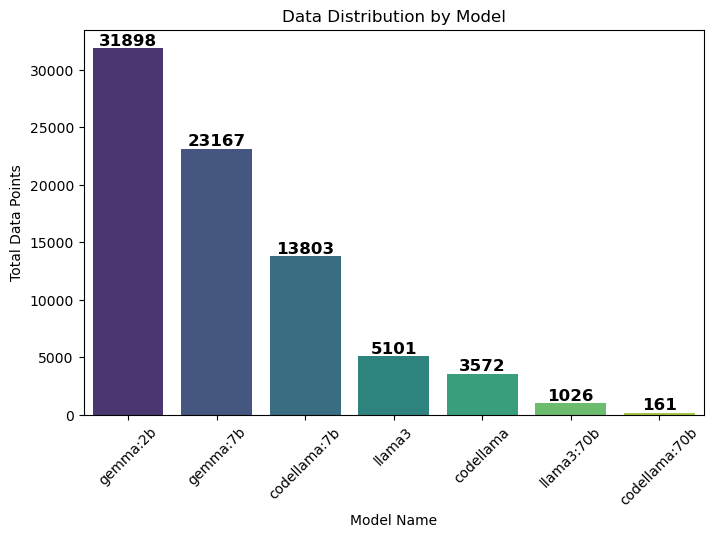

In [15]:
# Data Distribution by Model
model_counts = df["model_name"].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=model_counts.index, y=model_counts.values, hue=model_counts.index, dodge=False, legend=False, palette="viridis")

# Add exact count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.xticks(rotation=45)
plt.xlabel("Model Name")
plt.ylabel("Total Data Points")
plt.title("Data Distribution by Model")
plt.savefig("./plots/Data_Distribution.png", dpi=100, bbox_inches="tight")
plt.show()

# Feature Correlations Analysis

Understanding how different features interact helps in detecting **redundant variables, identifying strong relationships**, and improving feature selection. This step ensures that we **retain only meaningful features** for further analysis.

## **1️⃣ Identifying Redundant Features**
- Features that are **highly correlated** may provide **duplicate information**.
- Retaining too many correlated features can introduce **multicollinearity**, which affects model interpretability.
- Features with **correlation > 0.85** might be considered redundant.

## **2️⃣ Correlation Heatmap**
- A **correlation matrix** visualizes relationships between numerical features.
- The **heatmap highlights feature pairs** that have high or low correlation.
- Helps in **identifying feature clusters** that might impact dimensionality reduction techniques.

## **3️⃣ Feature Selection Based on Correlation**
- **Highly correlated features (> 0.85)** can be:
  - **Kept if using PCA**, as PCA transforms correlated features into independent components.
  - **Dropped if using models sensitive to multicollinearity**, such as regression or tree-based models.

## **Why is This Important?**
- Helps in **dimensionality reduction** by removing redundant features.  
- Improves **model efficiency and interpretability**.  
- Ensures better **feature selection for clustering or regression models**.

By analyzing feature correlations, we ensure the dataset is **well-structured and optimized** for further processing.


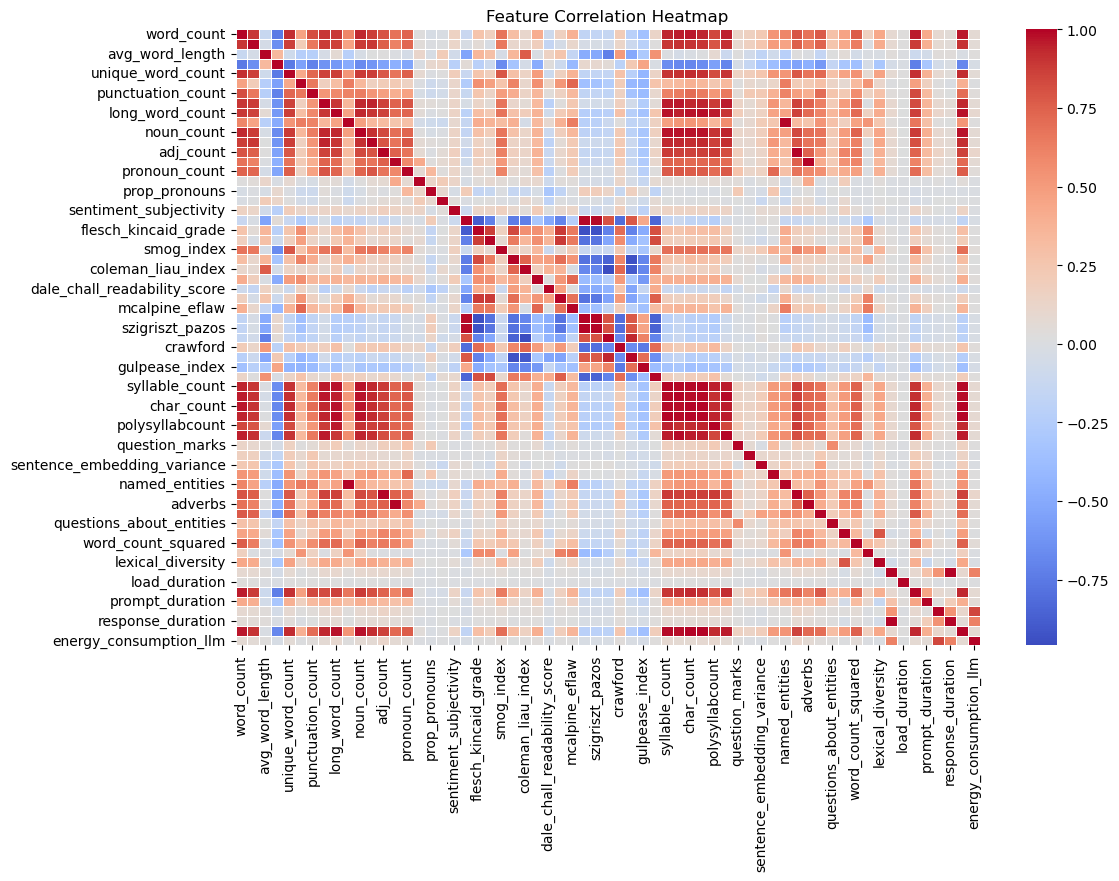

Highly Correlated Feature Pairs (Above 0.85):
 reading_time       char_count          1.000000
char_count         reading_time        1.000000
fernandez_huerta   szigriszt_pazos     0.997016
szigriszt_pazos    fernandez_huerta    0.997016
response_duration  total_duration      0.996800
                                         ...   
reading_time       adjectives          0.857277
adjectives         stop_word_count     0.855366
stop_word_count    adj_count           0.855366
adj_count          stop_word_count     0.855366
stop_word_count    adjectives          0.855366
Length: 244, dtype: float64


In [16]:
# Compute correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap to visualize feature correlations
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)

# Set plot titles and labels
plt.title("Feature Correlation Heatmap")
plt.savefig("./plots/correlation_features.png", dpi=100, bbox_inches="tight")
plt.show()

# Identify features with high correlation (above 0.85)
high_correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs < 1.0]  # Remove self-correlations

# Select top correlated pairs
top_correlations = high_correlation_pairs[high_correlation_pairs > 0.85]

# Display highly correlated feature pairs
print("Highly Correlated Feature Pairs (Above 0.85):\n", top_correlations)


# Pairwise Feature Relationships

Understanding how different features interact helps in detecting dependencies, clustering patterns, and non-linear relationships. This analysis ensures that we can make informed decisions about feature transformations, dimensionality reduction, or clustering techniques.

## **1. Visualizing Feature Dependencies**
- Pairwise scatter plots are generated to explore relationships between different features.
- Helps identify whether certain variables are strongly or weakly dependent on each other.
- Detects if features follow a trend or are randomly distributed.

## **2. Observing Clustering Patterns**
- Scatter plots reveal whether data points form natural clusters.
- If clusters are observed, this suggests that clustering algorithms (e.g., K-Means, DBSCAN) could be effective.
- Helps in understanding if specific models or categories of data behave similarly.

## **3. Distinguishing Linear vs. Non-Linear Relationships**
- Polynomial regression is used to determine whether feature relationships are linear or require transformation.
- If a non-linear pattern is detected, techniques like log transformation, polynomial features, or kernel methods may be required.
- Helps decide if dimensionality reduction techniques like PCA will be effective or if non-linear techniques (e.g., t-SNE, UMAP) are better.

## **Why is This Important?**
- Helps in identifying patterns that influence model predictions.  
- Guides whether feature engineering transformations (e.g., log scaling, polynomial expansion) are needed.  
- Provides insights for choosing appropriate clustering and dimensionality reduction techniques.  

By analyzing pairwise relationships, we ensure that our dataset is well-structured for further modeling and analysis.


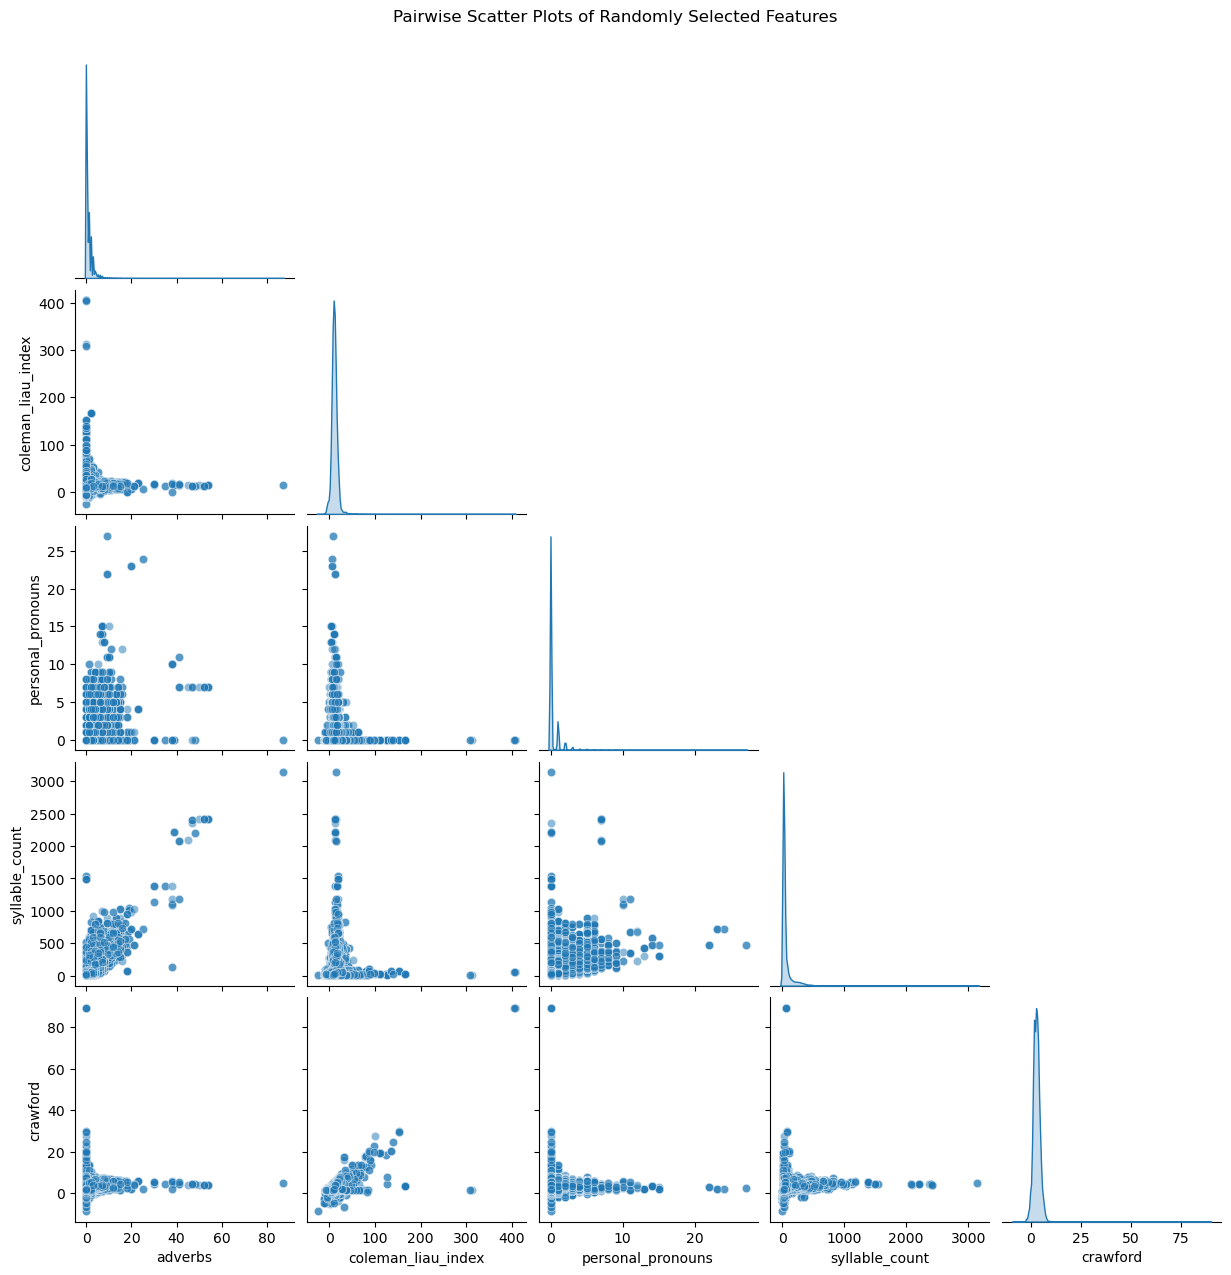

In [17]:
# Ensure numeric columns are used and clean data
df_numeric = df.select_dtypes(include=['number']).replace([np.inf, -np.inf], np.nan).dropna()

# Select 5 random numerical features
random_features = random.sample(list(df_numeric.columns), 5)

# Generate pairwise scatter plots for randomly selected features
sns.pairplot(df_numeric[random_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Scatter Plots of Randomly Selected Features", y=1.02)
plt.savefig("./plots/pair_wise_plots.png", dpi=100, bbox_inches="tight")
plt.show()

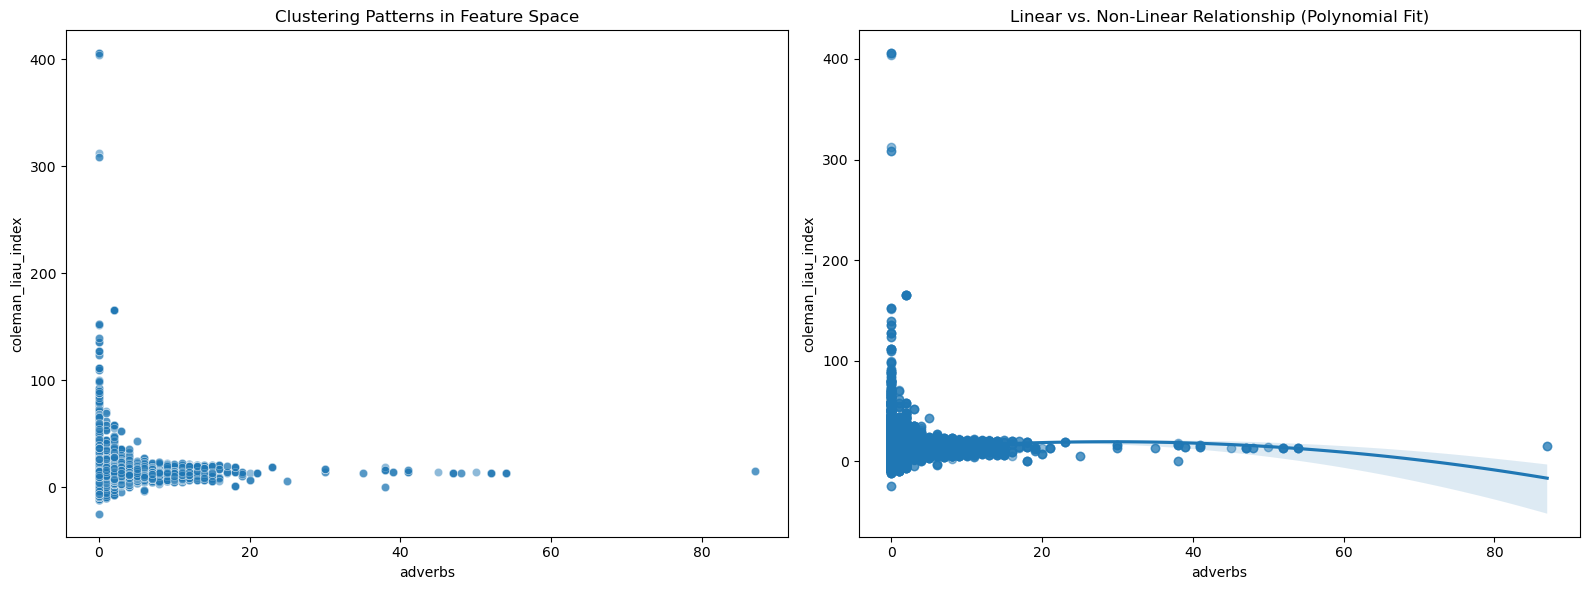

In [18]:
# Create side-by-side plots for clustering and linear vs. non-linear relationships
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for clustering visualization
sns.scatterplot(ax=axes[0], x=df_numeric[random_features[0]], y=df_numeric[random_features[1]], alpha=0.5)
axes[0].set_xlabel(random_features[0])
axes[0].set_ylabel(random_features[1])
axes[0].set_title("Clustering Patterns in Feature Space")

# Scatter plot for linear vs. non-linear relationship with polynomial fit
sns.regplot(ax=axes[1], x=df_numeric[random_features[0]], y=df_numeric[random_features[1]], order=2, scatter_kws={'alpha': 0.5})
axes[1].set_xlabel(random_features[0])
axes[1].set_ylabel(random_features[1])
axes[1].set_title("Linear vs. Non-Linear Relationship (Polynomial Fit)")

plt.tight_layout()
plt.show()


# Outlier Detection Using the IQR Method

Outliers are extreme values that can **distort analysis and impact model performance**. The **Interquartile Range (IQR) method** helps identify these outliers by detecting values significantly above or below the central range of a feature.

## **1️⃣ Feature-Level Outlier Detection**
- The IQR method is used to find **features with extreme variance or anomalies**.
- Features with many outliers may indicate **data entry errors, inconsistencies, or natural variations**.

## **2️⃣ Model-Level Outlier Distribution**
- We analyze whether **specific LLM models generate more extreme values**.
- Models with consistently high outlier counts may have **unstable performance, energy inefficiencies, or complex text generation**.

## **Why This Matters**
- Helps in **scaling, transformation, or filtering** to improve data quality.
- Guides **model selection** by identifying which LLMs produce stable, efficient outputs.
- Prepares the dataset for **clustering, regression, and further feature analysis**.

This step ensures the dataset is **clean, reliable, and ready for deeper insights.**


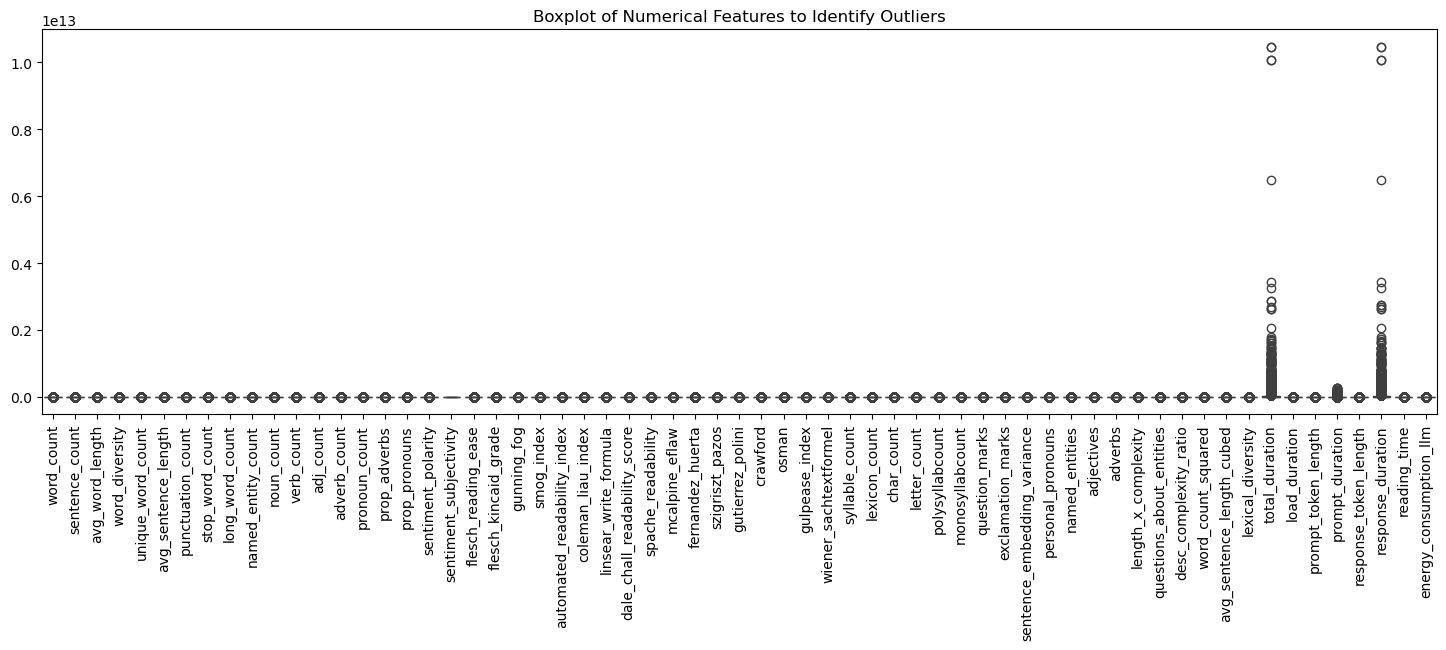

In [19]:
# Boxplot for Outliers in Numerical Features
plt.figure(figsize=(18, 5))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features to Identify Outliers")
plt.savefig("./plots/Boxplot_of_Numerical_Features.png", dpi=75, bbox_inches="tight")
plt.show()

In [20]:
# IQR Method for Outlier Detection
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outlier_counts = ((df.select_dtypes(include=np.number) < lower_bound) | (df.select_dtypes(include=np.number) > upper_bound)).sum()

# Per-Model Outlier Analysis
df_numeric = df.select_dtypes(include=np.number)
df_outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound)).sum(axis=1)  # Count outliers per row

# Merge with model names
df_outliers_per_model = pd.DataFrame({"model_name": df["model_name"], "outlier_count": df_outliers})

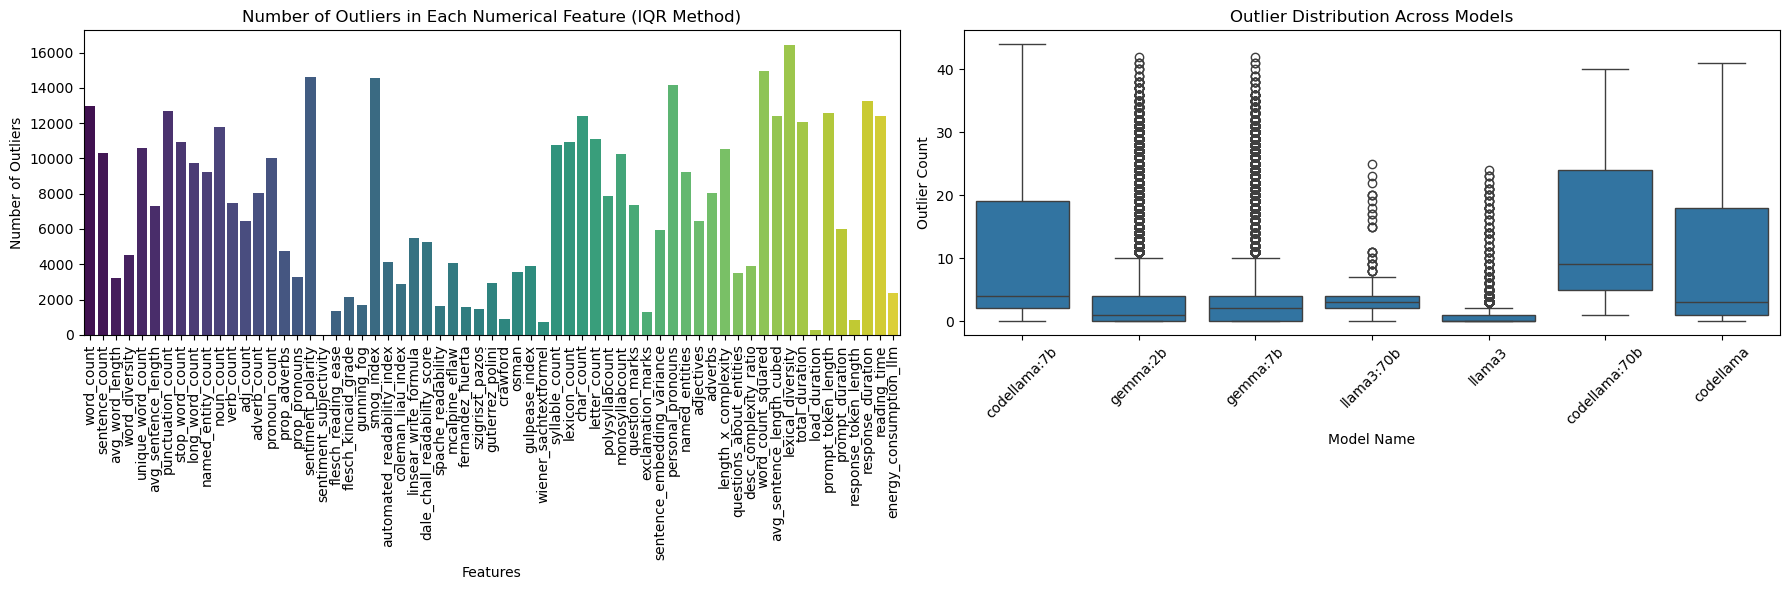

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Barplot: Outlier Counts Per Feature
sns.barplot(ax=axes[0], x=outlier_counts.index, y=outlier_counts.values, hue=outlier_counts.index, dodge=False, legend=False, palette="viridis")
axes[0].set_xticks(range(len(outlier_counts.index)))  
axes[0].set_xticklabels(outlier_counts.index, rotation=90)
axes[0].set_xlabel("Features")
axes[0].set_ylabel("Number of Outliers")
axes[0].set_title("Number of Outliers in Each Numerical Feature (IQR Method)")
plt.savefig("./plots/Outlier_in_Features.png", dpi=100, bbox_inches="tight")

# Boxplot: Outlier Distribution Per Model
sns.boxplot(ax=axes[1], x="model_name", y="outlier_count", data=df_outliers_per_model)
axes[1].set_xticks(range(len(df_outliers_per_model["model_name"].unique())))
axes[1].set_xticklabels(df_outliers_per_model["model_name"].unique(), rotation=45)
axes[1].set_xlabel("Model Name")
axes[1].set_ylabel("Outlier Count")
axes[1].set_title("Outlier Distribution Across Models")
plt.savefig("./plots/Outlier_Features_per_Model.png", dpi=100, bbox_inches="tight")

plt.tight_layout()
plt.show()


# Conclusion on Feature Analysis

The feature analysis provided critical insights into the dataset, helping identify necessary preprocessing steps before applying Principal Component Analysis (PCA).

## **1. Handling Missing Values**
- Missing values were detected and handled using **mean imputation**, ensuring feature completeness while minimizing data loss.

## **2. Detecting Feature Correlation & Redundancy**
- Several features exhibited **high correlation (>0.85)**, indicating redundancy.
- Since PCA has not been applied yet, these features remain in the dataset but will be assessed during dimensionality reduction.

## **3. Identifying Outliers & Scaling**
- Extreme outliers were found, especially in **duration-based and energy-related features**.
- Outliers were **filtered using the IQR method**, and **Robust Scaling** was applied to prevent extreme values from dominating the analysis.
- A **log transformation** was also applied to **normalize skewed distributions**.

## **4. Detecting Non-Linear Relationships**
- Pairwise feature relationships revealed **non-linear dependencies** in some cases.
- PCA primarily captures **linear variance**, so if non-linearity remains significant, alternative techniques such as **UMAP or t-SNE** may be considered after PCA.

## **Next Steps: Applying PCA**
- The dataset is now preprocessed and ready for **Principal Component Analysis (PCA)**.
- PCA will be applied to **analyze feature importance, reduce dimensionality, and retain key variance**.
- The effectiveness of PCA will be evaluated using **explained variance analysis** to determine the optimal number of components.

Once PCA is executed, we will assess whether additional transformations or non-linear techniques are needed.


# FEATURE ENGINEERING

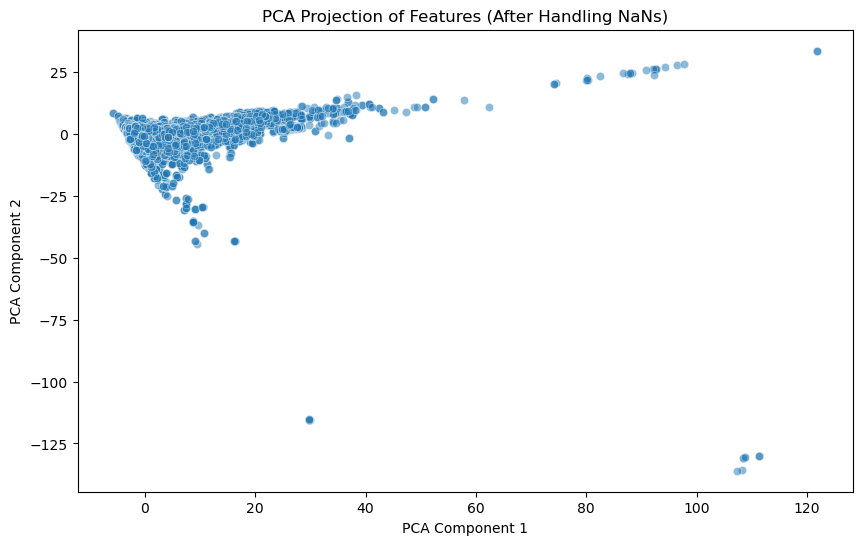

In [22]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")  # Replace NaNs with the column mean
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

# Standardize features before PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Scatter plot of PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Features (After Handling NaNs)")
plt.show()

In [23]:
# Set style
sns.set_style("whitegrid")

# Handle missing values
imputer = SimpleImputer(strategy="mean", keep_empty_features=True)  # Replace NaNs with column mean
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

# Shift values to ensure all are positive before log transformation
shift_value = abs(df_imputed.min().min()) + 1  # Find the most negative value and shift
df_shifted = df_imputed + shift_value  # Add shift to make all values positive

# Apply log transformation
df_log_transformed = np.log1p(df_shifted)  # log(1 + x) to avoid log(0)

# Robust Scaling to handle outliers
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df.columns[1:])

# Remove Outliers using IQR (Interquartile Range)
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]

# Ensure model_name matches the filtered data
df_filtered_index = df_scaled.index[df_filtered.index]  # Get the matching indices
model_names_filtered = df.iloc[df_filtered_index]["model_name"]  # Select matching model names

# Summary statistics
print("\nSummary Statistics:\n")
df_filtered.describe()


Summary Statistics:



,word_count,sentence_count,avg_word_length,word_diversity,unique_word_count,avg_sentence_length,punctuation_count,stop_word_count,long_word_count,named_entity_count,...,avg_sentence_length_cubed,lexical_diversity,total_duration,load_duration,prompt_token_length,prompt_duration,response_token_length,response_duration,reading_time,energy_consumption_llm
count,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,...,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000,26054.000000
mean,-0.172936,-0.604629,0.134964,0.110055,-0.201831,-0.044553,-0.105565,-0.114898,-0.105819,-0.154544,...,-0.018472,0.060894,0.106440,-0.129374,-0.146734,0.305645,-0.048740,0.111654,-0.153455,0.103281
std,0.346596,0.488940,0.669768,0.335058,0.362603,0.398195,0.295779,0.435534,0.446894,0.477022,...,0.376738,0.471559,0.796092,0.748267,0.299974,0.530316,0.526444,0.835762,0.371972,0.597083
min,-0.732104,-1.000000,-1.926701,-1.737042,-0.827762,-0.853219,-0.429353,-0.858966,-0.835107,-0.500152,...,-0.542904,-2.007740,-1.739568,-2.041605,-0.793290,-1.059116,-0.770293,-1.933126,-0.700970,-0.554098
25%,-0.456735,-1.000000,-0.318938,-0.086842,-0.472148,-0.300635,-0.286148,-0.429091,-0.500759,-0.500152,...,-0.275361,-0.214287,-0.375713,-0.486421,-0.359282,-0.096241,-0.597013,-0.386008,-0.449115,-0.400857
50%,-0.228023,-1.000000,0.100241,0.124695,-0.294825,-0.100151,-0.143031,-0.142944,-0.166818,-0.500152,...,-0.098163,0.061224,0.075053,0.056200,-0.215310,0.346560,-0.048239,0.075977,-0.265364,-0.055317
75%,0.045522,0.000000,0.583765,0.463141,0.058858,0.150113,0.000000,0.142857,0.166717,0.000000,...,0.154012,0.428557,0.776488,0.489082,0.035810,0.866248,0.410438,0.806480,0.102046,0.438664
max,1.577208,0.000000,2.005186,0.463141,1.750515,2.188133,2.135088,1.992154,2.159469,1.997569,...,1.955833,1.714097,1.784416,1.709712,1.834235,1.494509,1.748870,1.853706,1.767487,2.128898


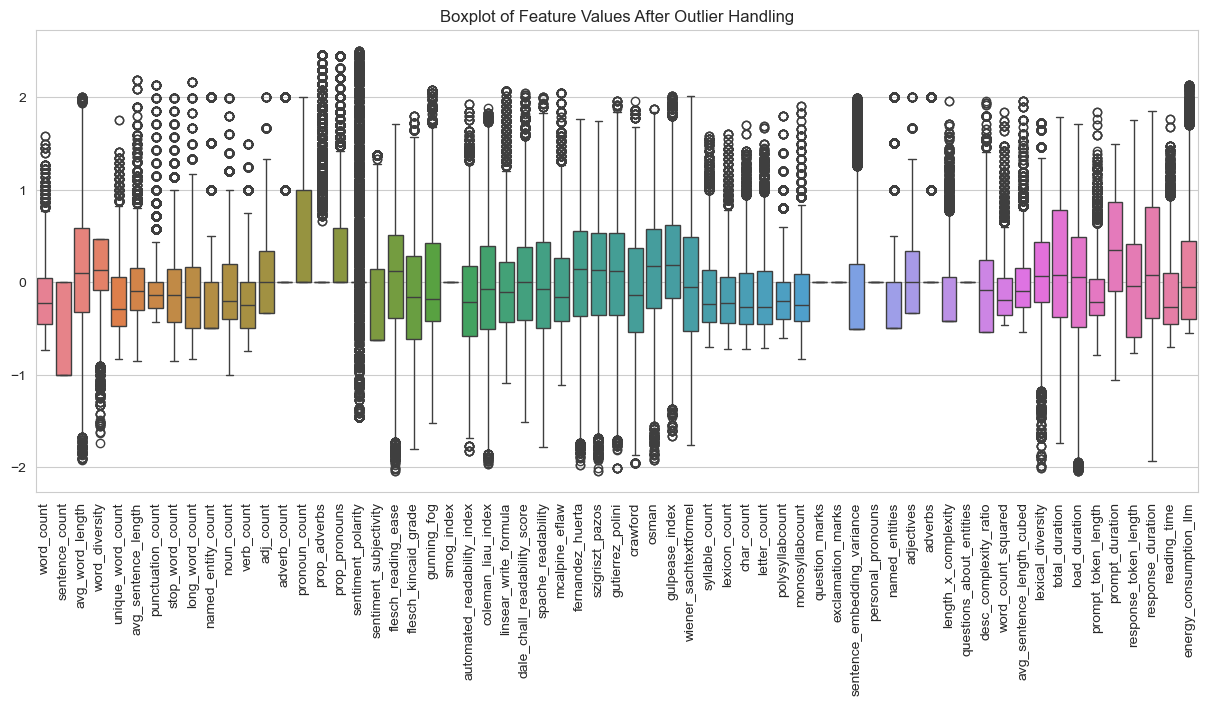

In [24]:
# Boxplot to check outlier removal
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_filtered)
plt.xticks(rotation=90)
plt.title("Boxplot of Feature Values After Outlier Handling")

plt.show()

In [25]:
# PCA Analysis
df_final = df_filtered.dropna()  # Ensure no NaNs remain
pca = PCA(n_components=10)  # Increase components to analyze variance
pca_result = pca.fit_transform(df_final)

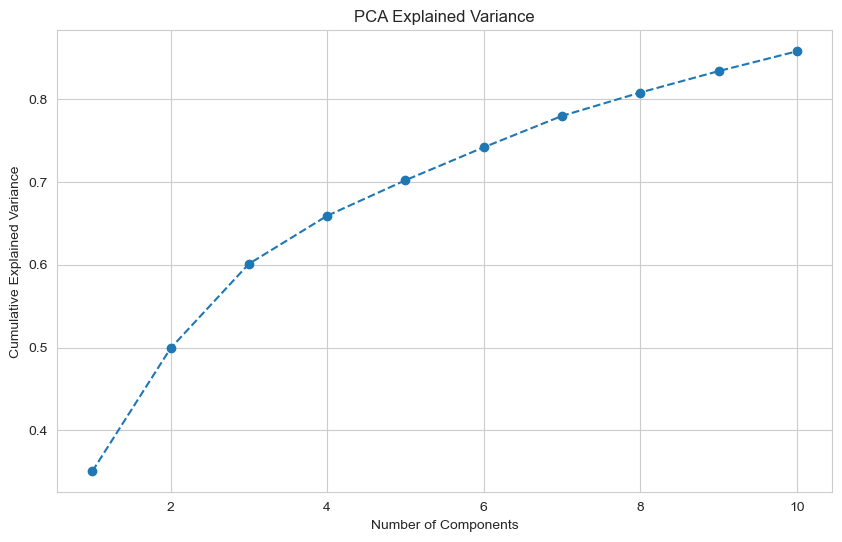

In [26]:
# Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

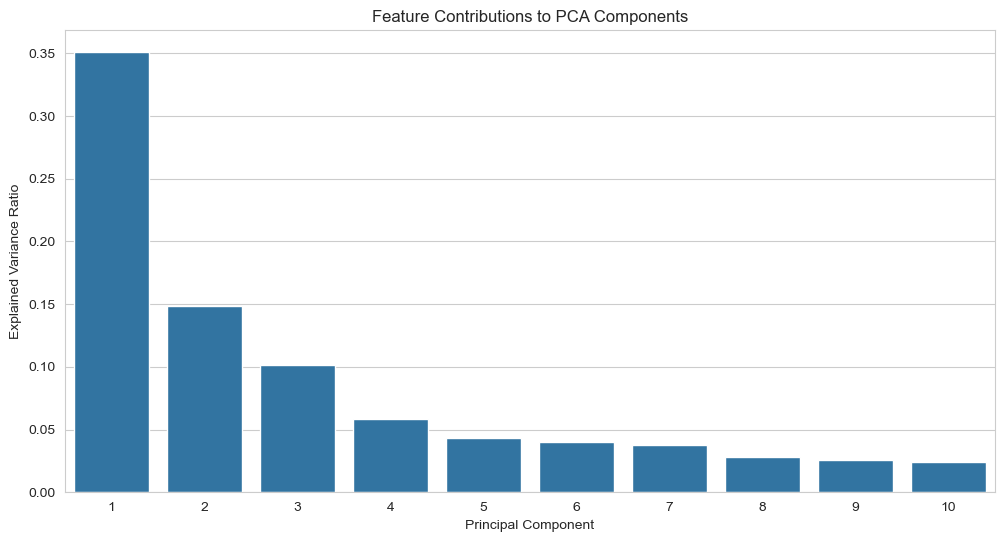

In [27]:
# Feature Contributions to PCA Components
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(1, 11), y=pca.explained_variance_ratio_[:10])
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Feature Contributions to PCA Components")
plt.show()

In [28]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result[:, :2])

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(pca_result[:, :2])

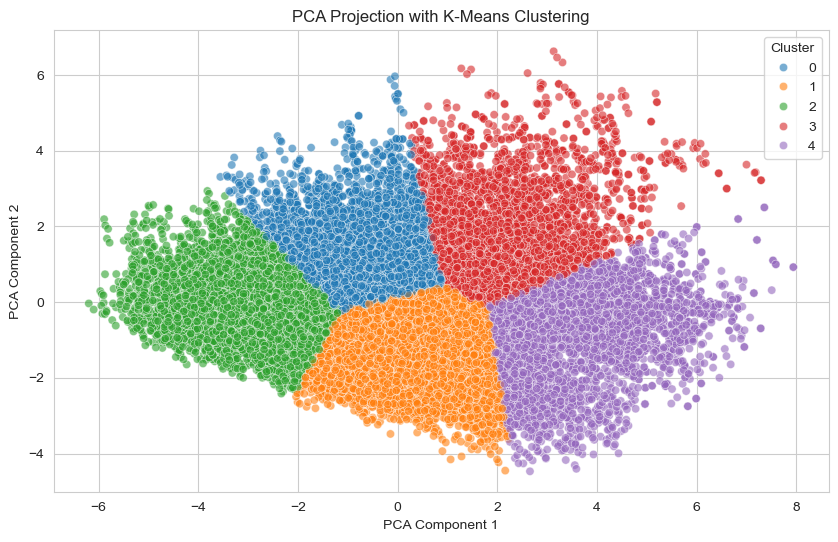

In [29]:
# Scatter plot of PCA components with K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette="tab10", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection with K-Means Clustering")
plt.legend(title="Cluster")
plt.show()


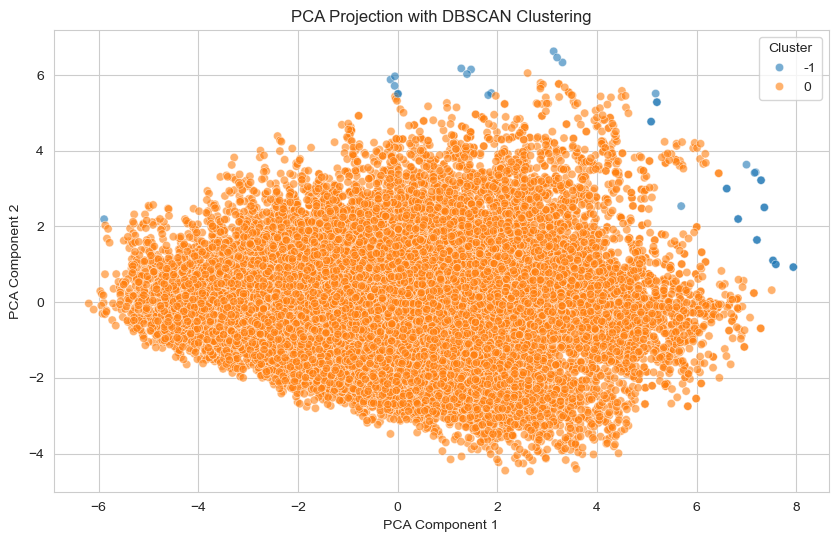

In [30]:
# Scatter plot of PCA components with DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dbscan_labels, palette="tab10", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection with DBSCAN Clustering")
plt.legend(title="Cluster")
plt.show()

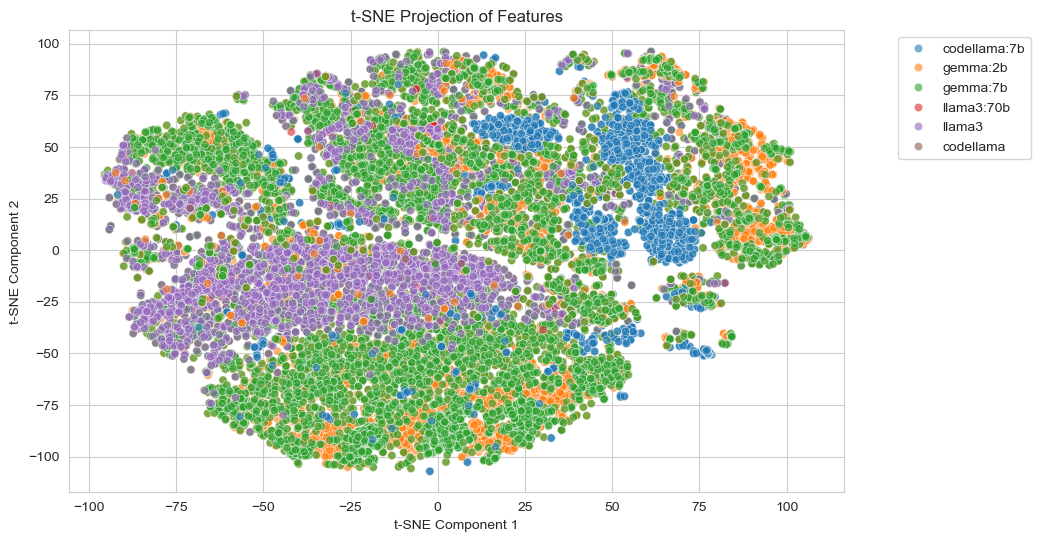

In [31]:
# t-SNE Projection
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df_final)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=model_names_filtered, palette="tab10", alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Features")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

/opt/anaconda3/envs/DataMining/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


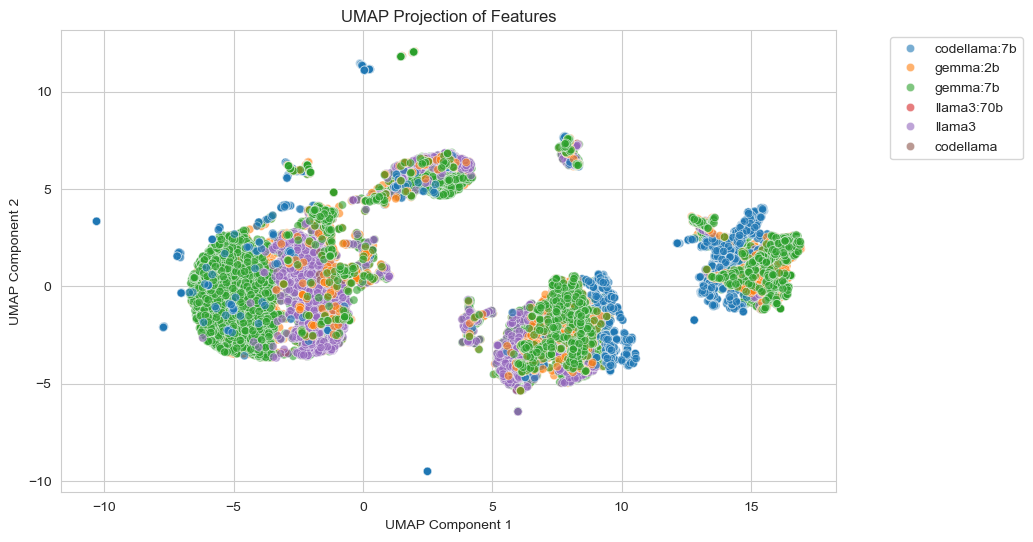

In [32]:
# UMAP Projection
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(df_final)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=model_names_filtered, palette="tab10", alpha=0.6)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Projection of Features")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [33]:
df_final

,word_count,sentence_count,avg_word_length,word_diversity,unique_word_count,avg_sentence_length,punctuation_count,stop_word_count,long_word_count,named_entity_count,...,avg_sentence_length_cubed,lexical_diversity,total_duration,load_duration,prompt_token_length,prompt_duration,response_token_length,response_duration,reading_time,energy_consumption_llm
5,0.408718,0.0,0.218302,-0.143739,0.411267,0.250113,0.142944,0.713420,0.666262,-0.500152,...,0.258955,-0.280790,1.468510,-1.084196,0.285879,1.441628,0.061790,1.490348,0.462536,1.522554
14,-0.182363,-1.0,0.680452,0.188154,-0.176788,0.399999,-0.286148,0.000000,-0.166818,-0.500152,...,0.416798,0.107141,1.473683,-1.038754,-0.179371,1.238899,0.103515,1.520261,-0.068036,1.560800
30,0.634833,0.0,-0.121663,-0.183902,0.645502,0.499848,0.428571,0.855845,0.499848,-0.500152,...,0.521051,-0.327735,1.471114,-1.064285,0.499395,1.494509,0.061790,1.484046,0.571340,1.552539
42,0.363414,0.0,-0.388966,0.306007,0.528454,0.200120,0.428571,0.570909,0.000000,-0.500152,...,0.206367,0.244892,1.450100,-1.206803,0.285879,1.416274,0.053406,1.473930,0.231292,1.445784
64,0.000000,0.0,0.738461,0.023158,0.000000,-0.200362,-0.143031,0.142857,0.333333,-0.500152,...,-0.190603,-0.085714,1.118905,-1.351064,0.000000,1.311520,-0.335119,1.118926,0.149665,0.493024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78670,-0.410937,-1.0,-0.084418,0.463141,-0.413005,-0.100151,-0.143031,-0.429091,-0.333738,0.499848,...,-0.098163,-1.386657,-0.960450,0.548174,-0.035831,-0.137502,-0.663736,-1.035407,-0.415085,-0.414709
78682,0.000000,0.0,1.805435,0.243153,0.058858,-0.200362,-0.143031,-0.142944,0.666262,-0.500152,...,-0.190603,1.033541,0.215051,0.022650,-0.035831,-0.143312,0.454738,0.280659,0.380926,0.888408
78694,0.136485,0.0,0.183502,0.080548,0.176469,-0.050068,0.142944,0.285627,0.333333,-0.500152,...,-0.049677,1.638483,-0.412498,0.658739,0.107365,-0.139845,-0.395600,-0.379895,0.170072,-0.103234
78710,-0.045550,0.0,0.164380,0.000000,-0.058894,-0.250491,-0.143031,0.000000,0.000000,-0.500152,...,-0.234065,0.428557,-0.024549,0.421300,-0.071684,-0.124676,0.025364,0.032454,-0.020410,0.407355


In [34]:
df_final.to_csv("Final_PCA.csv", index=False)

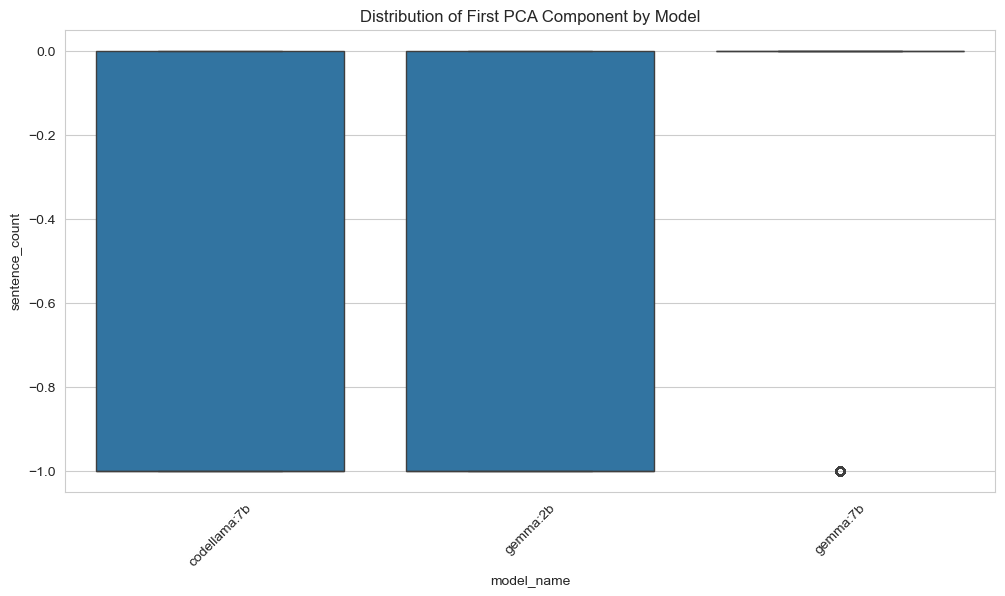

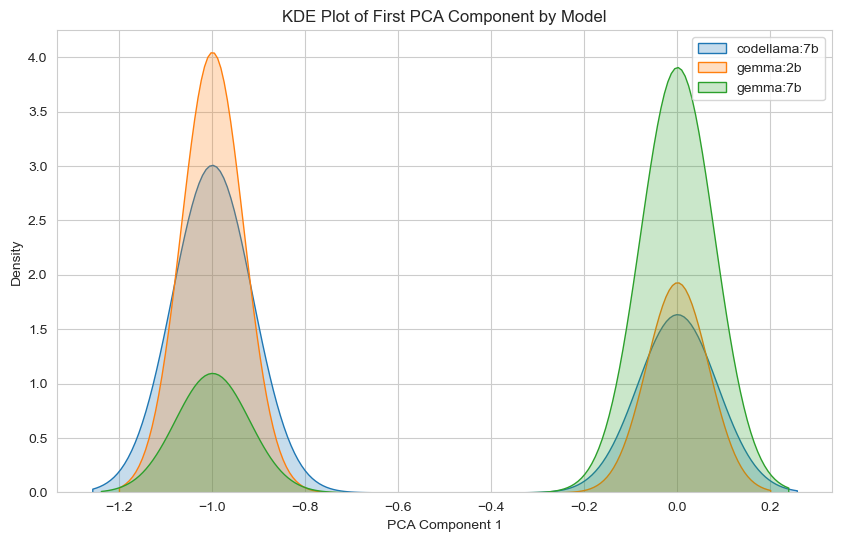

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
final_df = pd.read_csv("Final.csv")  # Original dataset (contains model names)
pca_df = pd.read_csv("Final_PCA.csv")  # PCA-transformed data

# Ensure index alignment (Assuming row order is preserved)
pca_df["model_name"] = final_df["model_name"]


# Plot Distribution of PCA Components by Model
plt.figure(figsize=(12, 6))
sns.boxplot(x="model_name", y=pca_df.iloc[:, 1], data=pca_df)  # Change `1` to different PCA component index
plt.xticks(rotation=45)
plt.title("Distribution of First PCA Component by Model")
plt.show()

# KDE Plot for Distribution of PCA Features by Model
plt.figure(figsize=(10, 6))
for model in pca_df["model_name"].unique():
    sns.kdeplot(pca_df[pca_df["model_name"] == model].iloc[:, 1], label=model, fill=True)
plt.xlabel("PCA Component 1")
plt.ylabel("Density")
plt.title("KDE Plot of First PCA Component by Model")
plt.legend()
plt.show()


In [36]:
df= pca_df

## Feature Importance

In [37]:
# Get unique models
models = df["model_name"].unique()

# Store feature importance results, variance results, and important features per model
feature_importance_results = {}
variance_results = {}

# Loop through each model, train XGBoost, Random Forest, and LightGBM, and store feature importance
for model in models:
    print(f"Training for model: {model}")
    
    # Filter data for the specific model
    df_model = df[df["model_name"] == model].copy()
    df_model = df_model.drop(columns=["model_name"])  # Drop model name column
    
    # Define features and target
    X = df_model.drop(columns=["energy_consumption_llm"])
    y = df_model["energy_consumption_llm"]
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Train XGBoost Regressor
    model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model_xgb.fit(X_train, y_train)
    
    # Train Random Forest Regressor
    model_rf = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=42, n_jobs=-1)
    model_rf.fit(X_train, y_train)
    
    # Store feature importance
    feature_importance_results[model] = {
        "XGBoost": model_xgb.feature_importances_,
        "RandomForest": model_rf.feature_importances_,
    }
    variance_results[model] = {
    "XGBoost": np.var(y_test - model_xgb.predict(X_test)),
    "RandomForest": np.var(y_test - model_rf.predict(X_test))}


Training for model: codellama:7b
Training for model: gemma:2b
Training for model: gemma:7b


## PLOTS

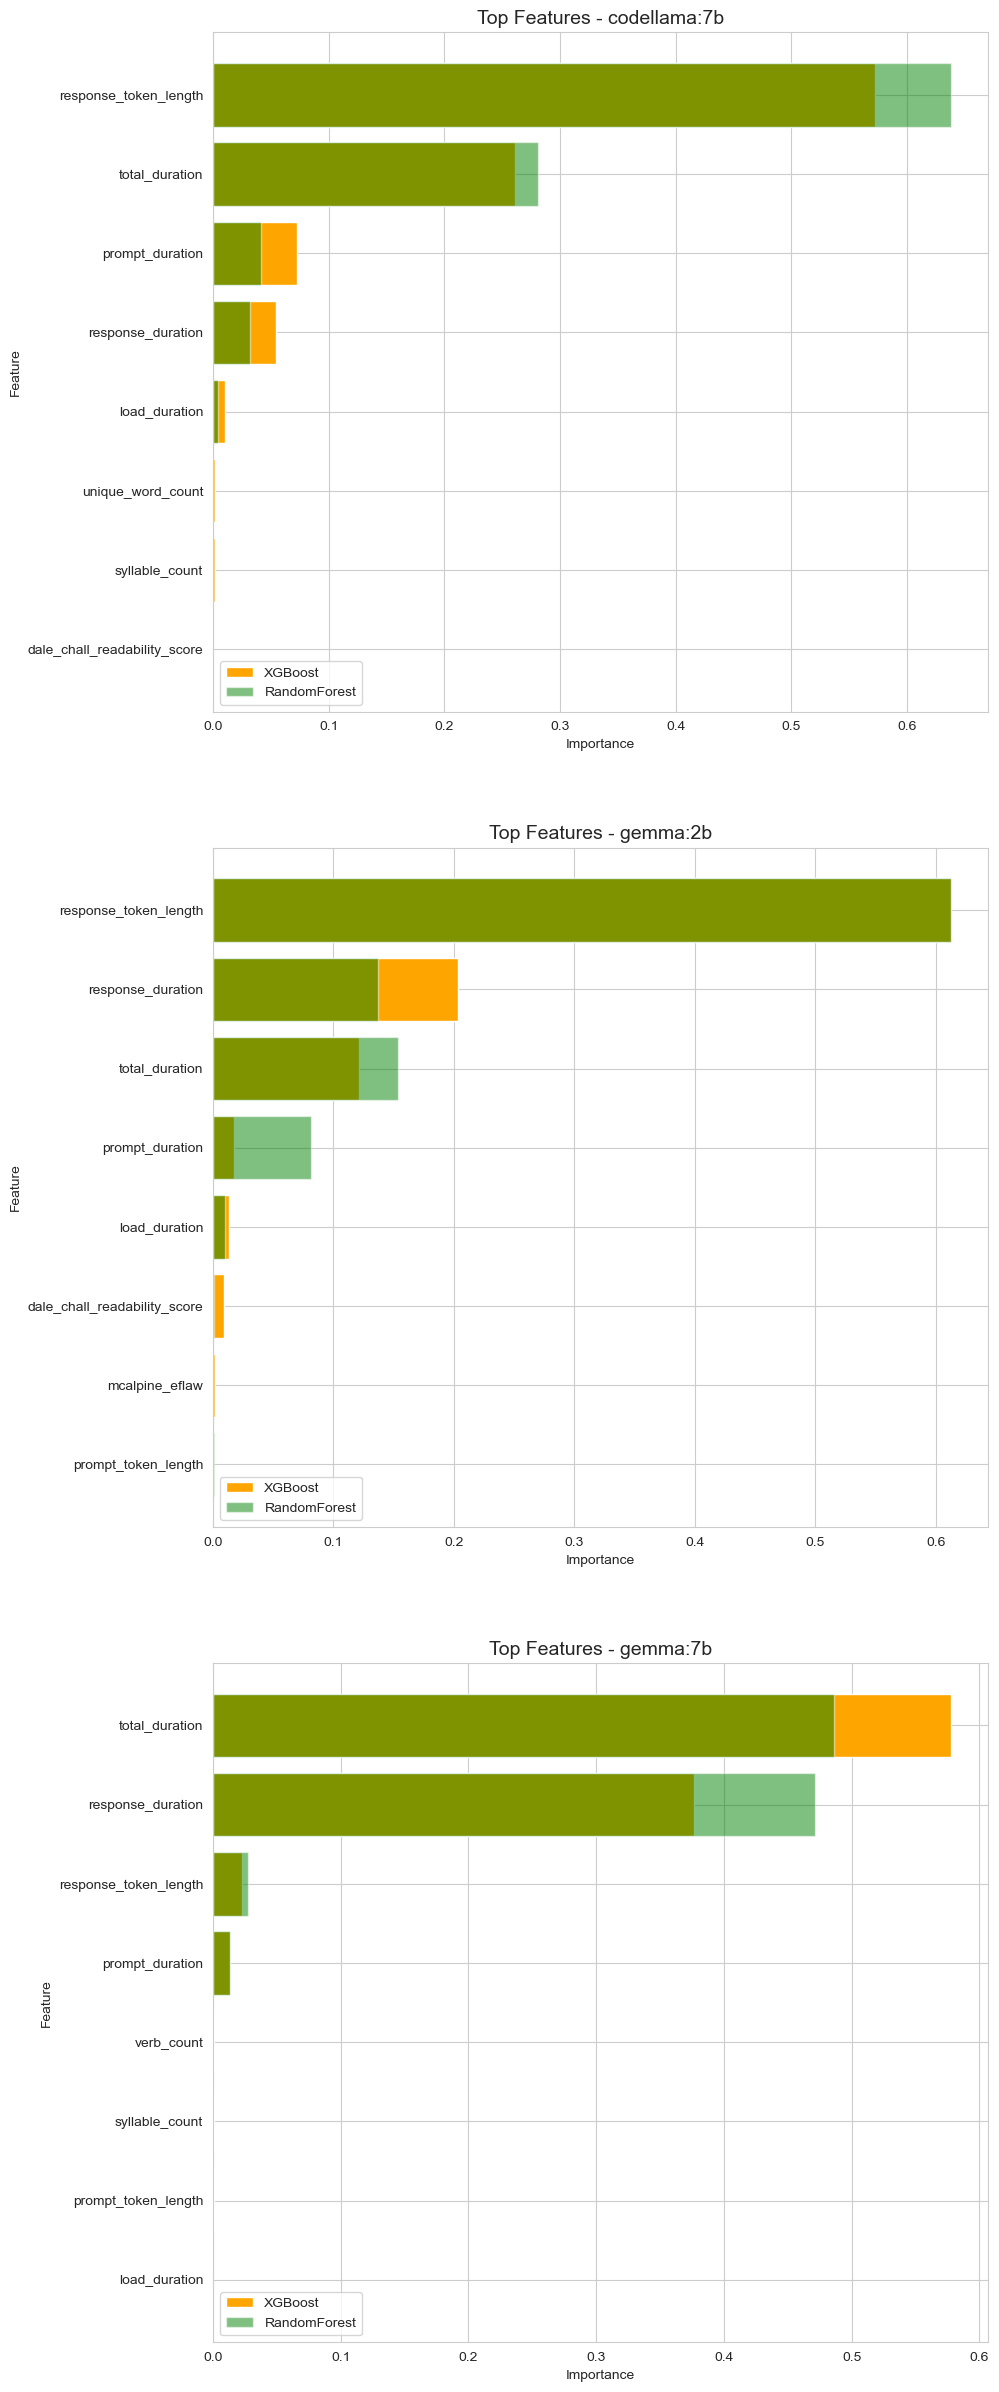

In [38]:
# Plots for Important Features
num_models = len(feature_importance_results)
fig, axes = plt.subplots(nrows=num_models, ncols=1, figsize=(10,30))  # Adjust height dynamically
axes = axes.flatten()

for i, (model, importance) in enumerate(feature_importance_results.items()):
    feature_importance_xgb = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importance["XGBoost"]
    }).sort_values(by="Importance", ascending=False)
    
    feature_importance_rf = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importance["RandomForest"]
    }).sort_values(by="Importance", ascending=False)
    
    ax = axes[i]
    
    ax.barh(feature_importance_xgb["Feature"][:7], feature_importance_xgb["Importance"][:7], color='orange', label='XGBoost')
    ax.barh(feature_importance_rf["Feature"][:7], feature_importance_rf["Importance"][:7], color='green', alpha=0.5, label='RandomForest')
    
    ax.set_xlabel("Importance")
    ax.set_ylabel("Feature")
    ax.set_title(f"Top Features - {model}", fontsize=14)
    ax.invert_yaxis()
    ax.legend(fontsize=10)

plt.subplots_adjust()
plt.show()

## ANALYSIS

In [39]:
Feature_Importance=pd.DataFrame(feature_importance_results)
Feature_Importance

,codellama:7b,gemma:2b,gemma:7b
XGBoost,"[0.0004391111, 5.7668207e-05, 0.00040080253, 0...","[0.00046691997, 0.0005083265, 0.0002559291, 0....","[7.614693e-05, 3.6468162e-05, 6.793798e-05, 5...."
RandomForest,"[3.344284152716636e-05, 1.8607202389570811e-06...","[0.00010976424924470214, 3.148157757878204e-06...","[5.866836277711437e-06, 3.3329816170223526e-06..."


In [40]:
variance_df = pd.DataFrame(variance_results).T
variance_df_sorted = variance_df.sort_values(by="XGBoost", ascending=True)
variance_df_sorted

,XGBoost,RandomForest
gemma:7b,0.000637,0.000639
codellama:7b,0.001419,0.001294
gemma:2b,0.001815,0.002637


In [44]:
import pandoc
